![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/spark-nlp-workshop/blob/master/tutorials/Certification_Trainings_JSL/Finance/5.2.Financial_NER_Inference_Training.ipynb)

# Identifying Entities in Financial Texts

In this notebook, you will learn how to use Spark NLP and Finance NLP to identify relevant entities in financial texts using our state-of-the-art Named-Entity Recognition (NER) models.

## Named-Entity Recognition

Named-Entity Recognition (NER) is the capability to automatically identify relevant entities in the text. For example, person names, company names, public companies trading code, quantities, etc. There are many ways to implement NER, but nowadays the most efficient one is to use models based on deep learning.

At John Snow Labs, we are proud to have a library of state-of-the-art pretrained, out-of-the-box, NLP models. With our newer package Finance NLP it is no difference, and we curetly support more than 100 models fine tuned for the financial domain. Specifically to NER, we currently have more than 30 models that can identify entities for different business needs.


Example models:

| title                                                   | language   | predicted_entities                                                                                                                                                                           | compatible_editions                |
|:--------------------------------------------------------|:-----------|:---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:-----------------------------------|
| Generic Deidentification NER                            | en         | ['AGE', 'CITY', 'COUNTRY', 'DATE', 'EMAIL', 'FAX', 'LOCATION-OTHER', 'ORG', 'PERSON', 'PHONE', 'PROFESSION', 'STATE', 'STREET', 'URL', 'ZIP']                                                | ['Finance NLP 1.0', 'Finance NLP'] |
| Extract Tickers on Financial Texts (RoBerta)            | en         | ['TICKER']                                                                                                                                                                                   | ['Finance NLP 1.0', 'Finance NLP'] |
| Extract Tickers on Financial Texts                      | en         | ['TICKER']                                                                                                                                                                                   | ['Finance NLP 1.0', 'Finance NLP'] |
| Extract Financial, Legal and Generic Entities in Arabic | ar         | ['NORP', 'PERS', 'LOC', 'MONEY', 'TIME', 'ORG', 'WEBSITE', 'ORDINAL', 'PERCENT', 'EVENT', 'QUANTITY', 'OCC', 'LANGUAGE', 'CARDINAL', 'DATE', 'GPE', 'PRODUCT', 'CURR', 'FAC', 'UNIT', 'LAW'] | ['Finance NLP 1.0', 'Finance NLP'] |
| Financial 10K Filings NER                               | en         | ['ADDRESS', 'CFN', 'FISCAL_YEAR', 'IRS', 'ORG', 'PHONE', 'STATE', 'STOCK_EXCHANGE', 'TICKER', 'TITLE_CLASS', 'TITLE_CLASS_VALUE']                                                            | ['Finance NLP 1.0', 'Finance NLP'] |
| Financial ORG, PRODUCT and ALIAS NER (Large)            | en         | ['ORG', 'PROD', 'ALIAS']                                                                                                                                                                     | ['Finance NLP 1.0', 'Finance NLP'] |
| Financial NER (Headers / Subheaders)                    | en         | ['HEADER', 'SUBHEADER']                                                                                                                                                                      | ['Finance NLP 1.0', 'Finance NLP'] |
| Financial Job Titles NER                                | en         | ['ROLE']                                                                                                                                                                                     | ['Finance NLP 1.0', 'Finance NLP'] |
| Financial ORG, PER, ROLE, DATE NER                      | en         | ['ORG', 'PER', 'DATE', 'ROLE']                                                                                                                                                               | ['Finance NLP 1.0', 'Finance NLP'] |
| Generic NER on Financial Texts                          | en         | ['ORG', 'LOC', 'PER']                                                                                                                                                                        | ['Finance NLP 1.0', 'Finance NLP'] |


For the complete list, check the [NLP Models Hub](https://nlp.johnsnowlabs.com/models).

## Environment Setup

First, you need to setup the environment to be able to use the licensed package. If you are not running in Google Colab, please check the documentation [here](https://nlp.johnsnowlabs.com/docs/en/licensed_install).

In [ ]:
# Install the johnsnowlabs library to access Spark-OCR and Spark-NLP for Healthcare, Finance, and Legal.
! pip install -qU johnsnowlabs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.2/74.2 KB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 570.6/570.6 KB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 448.4/448.4 KB 33.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.4/212.4 MB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.4/95.4 KB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 KB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.9/66.9 KB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.3/82.3 KB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 66.3 MB/s eta 0:00:00


In [ ]:
from johnsnowlabs import nlp
# Log in to your John Snow Labs account to login and get your license keys
nlp.install(force_browser=True)

<IPython.core.display.Javascript object>

127.0.0.1 - - [07/Jan/2023 18:47:58] "GET /login?code=lsBQeGSjviqkSBDEwH9bi8CwwkFreb HTTP/1.1" 200 -


<IPython.core.display.Javascript object>

Licenses extracted successfully
📋 Stored John Snow Labs License in /root/.johnsnowlabs/licenses/license_number_0_for_Spark-Healthcare_Spark-OCR.json
👷 Setting up  John Snow Labs home in /root/.johnsnowlabs, this might take a few minutes.
🙆 JSL Home setup in /root/.johnsnowlabs
Installing /root/.johnsnowlabs/py_installs/spark_nlp_jsl-4.2.4-py3-none-any.whl to /usr/bin/python3
Running: /usr/bin/python3 -m pip install /root/.johnsnowlabs/py_installs/spark_nlp_jsl-4.2.4-py3-none-any.whl
Installed 1 products:
💊 Spark-Healthcare==4.2.4 installed! ✅ Heal the planet with NLP! 


Also, let's install some tools to display PDF files that will be used on examples.

In [ ]:
!apt-get install poppler-utils

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 21 not upgraded.
Need to get 154 kB of archives.
After this operation, 613 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 poppler-utils amd64 0.62.0-2ubuntu2.14 [154 kB]
Fetched 154 kB in 0s (316 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 124016 files and directories currently installed.)
Preparing to unpack .../poppler-utils_0.62.0-2ubuntu2.14_amd64.deb ...
Unpacking poppler-utils (0.62.0-2ubuntu2.14) ...
Setting up poppler-utils (0.62.0-2ubuntu2.14) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [ ]:
!pip install pdf2image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


> Please restart the runtime and follow to the next cells

## NerModel annotator

The deep neural network architecture for NER model in Spark NLP is BiLSTM-CNN-Char framework. It's a slightly modified version of the architecture proposed by Jason PC Chiu and Eric Nichols ([Named Entity Recognition with Bidirectional LSTM-CNNs](https://arxiv.org/abs/1511.08308)). A neural network architecture that automatically detects word and character-level features using a hybrid bidirectional LSTM and CNN architecture, eliminating the need for most feature engineering steps. This model is implemented in our `NerDL`/`NerModel` annotators that we will experiment with in this section.

Before using the model, let's first start the Spark Session, which can be done using our library: 

In [ ]:
import pyspark.sql.functions as F
from johnsnowlabs import nlp, finance, viz
# Automatically load license data and start a session with all jars user has access to
spark = nlp.start()

📋 Loading license number 0 from /root/.johnsnowlabs/licenses/license_number_0_for_Spark-Healthcare_Spark-OCR.json
👌 Launched cpu optimized session with with: 🚀Spark-NLP==4.2.4, 💊Spark-Healthcare==4.2.4, running on ⚡ PySpark==3.1.2


To use NER models, you need the transform the data into the document class, then split the text into sentences to reduce its size, then split each token of the sentence and transform them into embedding vectors. Then you can apply the NER model and use the `NerConverterInternal` for cleaner version of the entities. Let's create a function that will define the spark pipeline with the requested model!

Since the models work with the embeddings they were trained with, the function will have three parameters to create the pipeline:

- `ner_model`, with the name of the pretrained model we want to load
- `embeddings`, with the name of the embedding model required by the ner model
- `language`, containing the code of the language of the embedding and ner model (defaults to `en`)

In [ ]:
def create_pipeline(ner_model, embeddings, language="en"):
    documentAssembler = documentAssembler = (
        nlp.DocumentAssembler().setInputCol("text").setOutputCol("document")
    )

    # Consider using SentenceDetector with rules/patterns to get smaller chunks from long sentences
    sentence_detector = (
        nlp.SentenceDetectorDLModel.pretrained("sentence_detector_dl", "xx")
        .setInputCols(["document"])
        .setOutputCol("sentence")
    )

    tokenizer = (
        nlp.Tokenizer()
        .setInputCols(["sentence"])
        .setOutputCol("token")
        .setContextChars(['.', ',', ';', ':', '!', '?', '*', '-', '(', ')', '”', '’', '$','€'])
    )

    embeddings = (
        nlp.BertEmbeddings.pretrained(embeddings, language)
        .setInputCols(["sentence", "token"])
        .setOutputCol("embeddings")
        .setMaxSentenceLength(512)
    )

    ner_model = (
        finance.NerModel.pretrained(ner_model, language, "finance/models")
        .setInputCols(["sentence", "token", "embeddings"])
        .setOutputCol("ner")
    )

    ner_converter = (
        finance.NerConverterInternal()
        .setInputCols(["sentence", "token", "ner"])
        .setOutputCol("ner_chunk")
    )

    nlpPipeline = nlp.Pipeline(
        stages=[
            documentAssembler,
            sentence_detector,
            tokenizer,
            embeddings,
            ner_model,
            ner_converter,
        ]
    )

    empty_data = spark.createDataFrame([[""]]).toDF("text")

    model = nlpPipeline.fit(empty_data)
    return model

> Please note that we added special characters in the tokenizer step in order to propertly identify some financial tokens. In special, the chars `$` or other currency chars are important. 

### Application: Identify financial entities in SEC 10K fillings

We will use our pretrained models to extract information from sections of a 10-K filling report. For example, we will use the report from the company AMD, available [here](https://ir.amd.com/sec-filings/filter/annual-filings?year=2022).

In [ ]:
link = "https://ir.amd.com/sec-filings/filter/annual-filings/content/0000002488-22-000016/0000002488-22-000016.pdf"

In [ ]:
! wget $link -O 10k_report.pdf

--2023-01-07 18:59:35--  https://ir.amd.com/sec-filings/filter/annual-filings/content/0000002488-22-000016/0000002488-22-000016.pdf
Resolving ir.amd.com (ir.amd.com)... 65.9.66.22, 65.9.66.104, 65.9.66.121, ...
Connecting to ir.amd.com (ir.amd.com)|65.9.66.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: ‘10k_report.pdf’

10k_report.pdf          [ <=>                ]   1.45M  --.-KB/s    in 0.06s   

2023-01-07 18:59:36 (24.8 MB/s) - ‘10k_report.pdf’ saved [1518628]



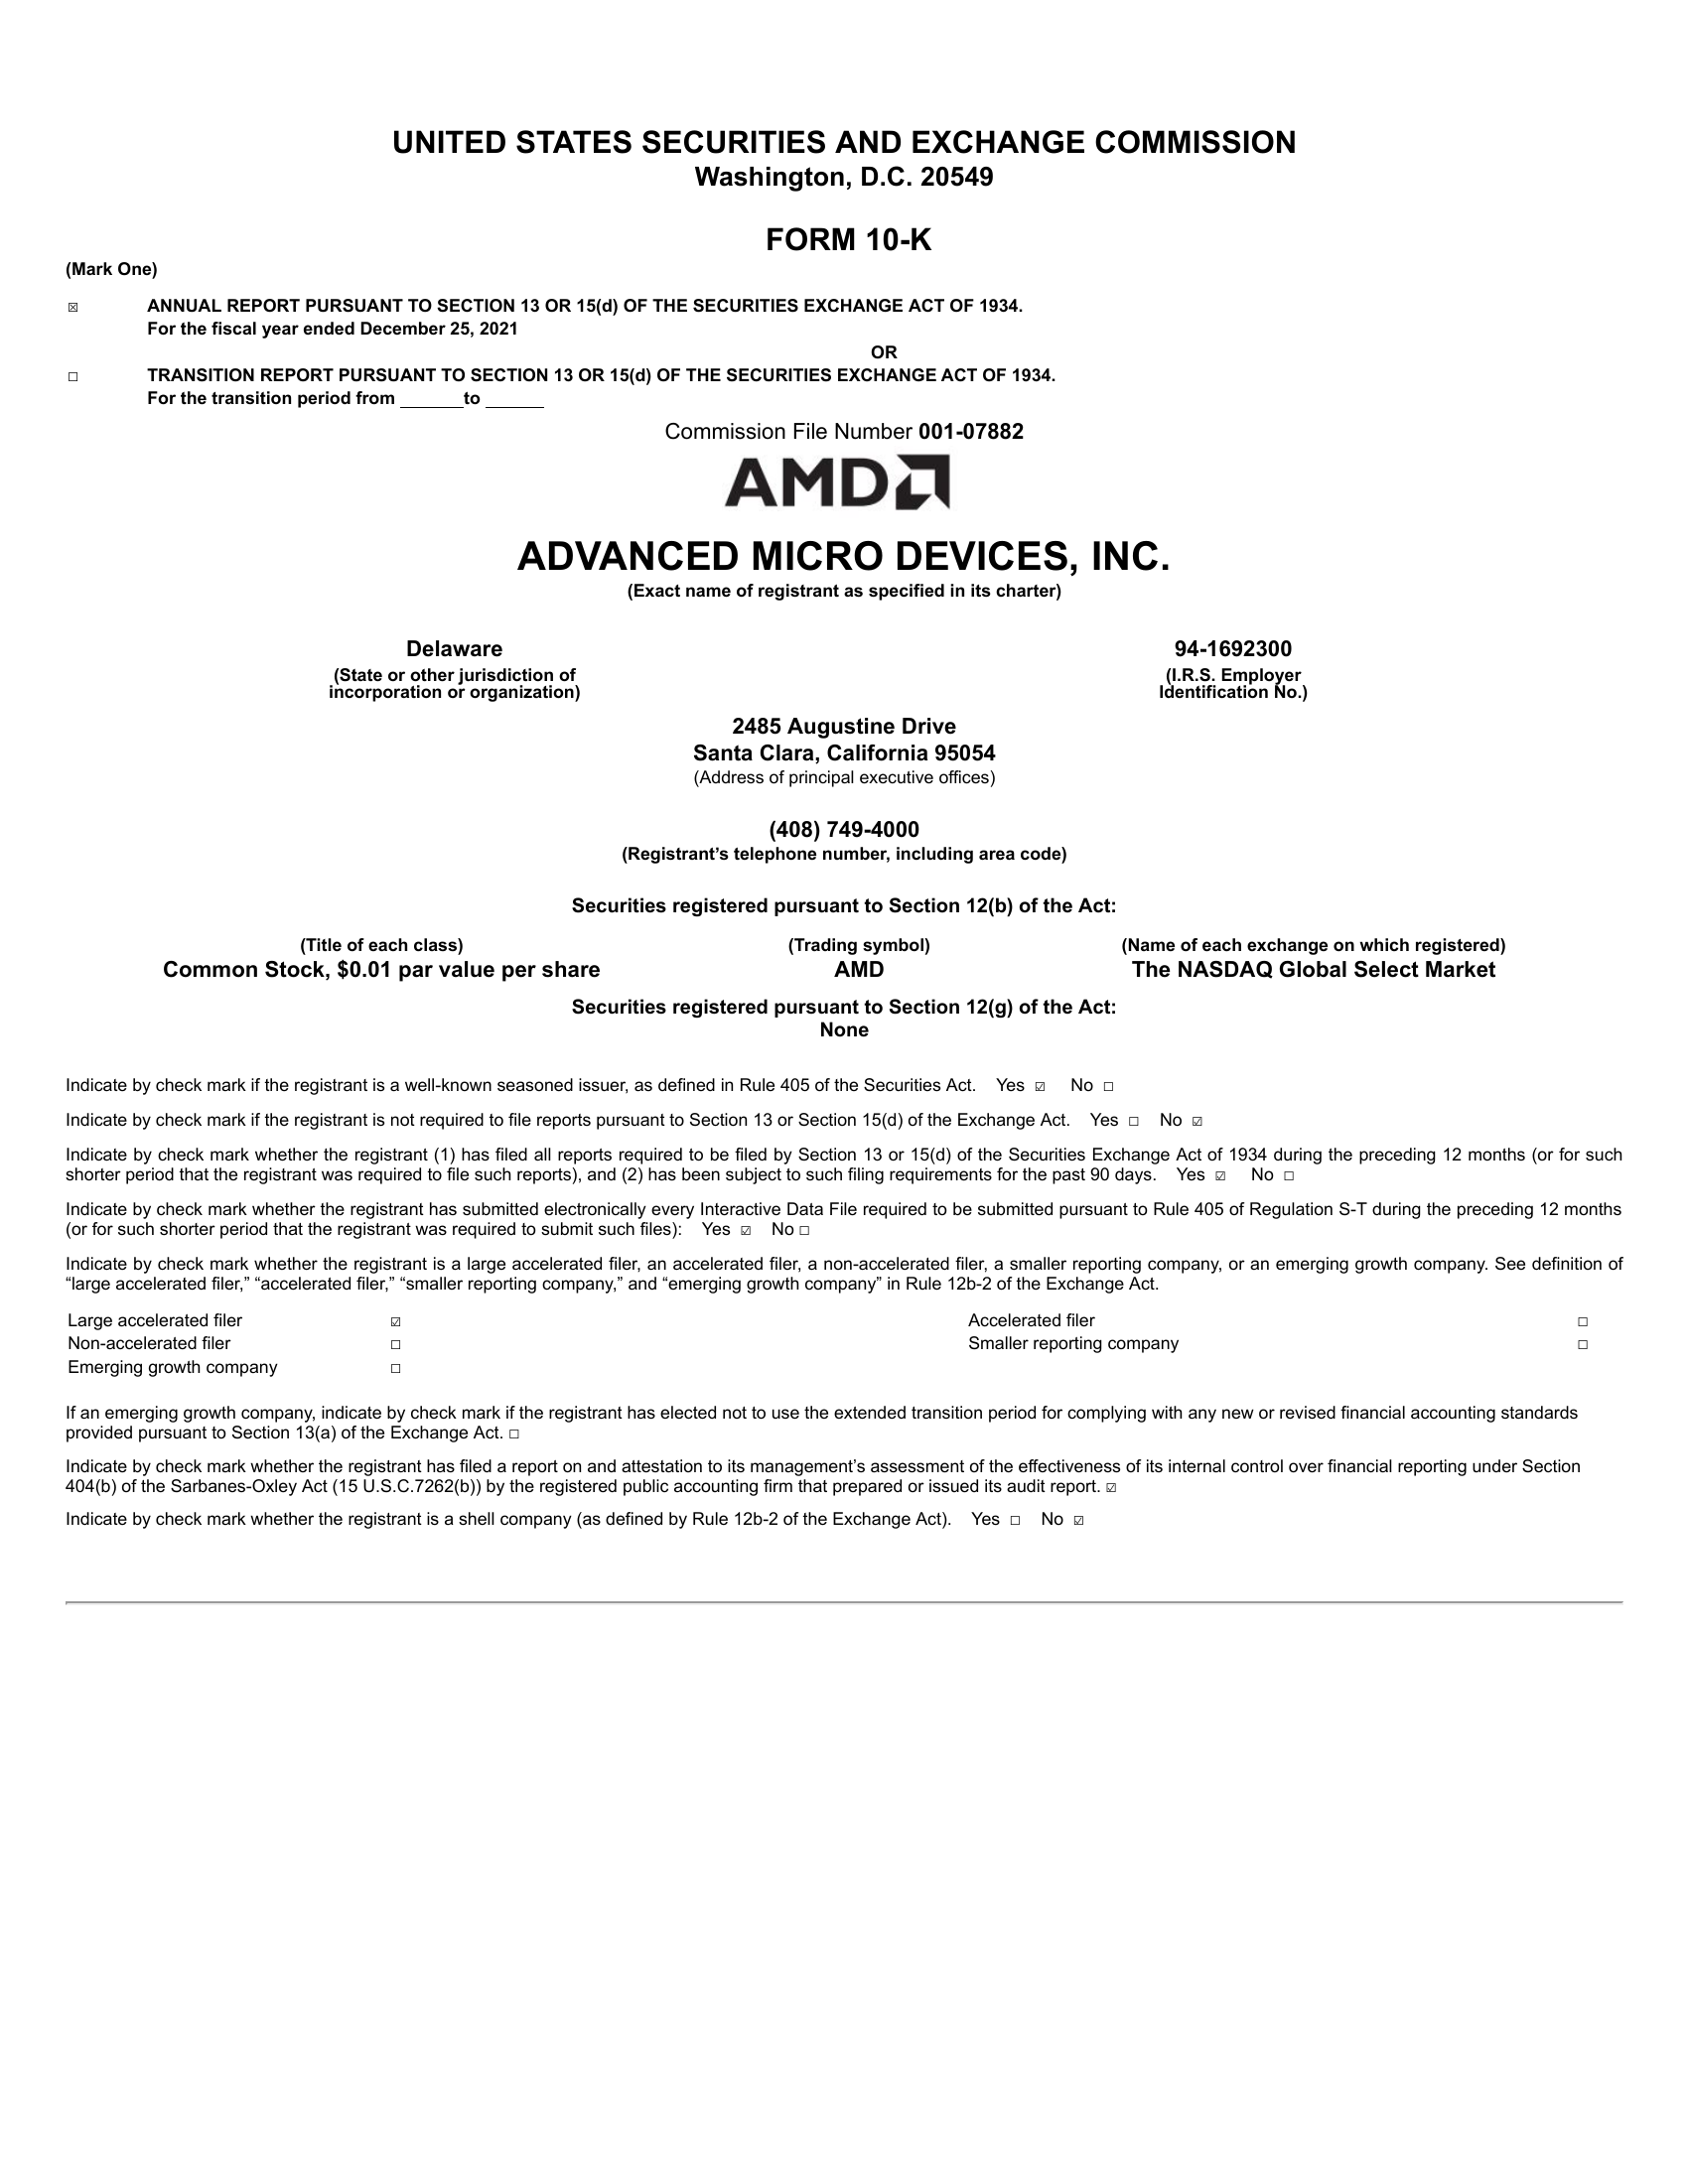

In [ ]:
from pdf2image import convert_from_path
images = convert_from_path("10k_report.pdf")
images[0]

In [ ]:
len(images)

118

This document has 188 pages, which is very big to run through any model. We will selct part of the document that contains relevant information. For example, the contents of the first paragraph os section "ITEM 7. MANAGEMENT’S DISCUSSION AND ANALYSIS OF FINANCIAL CONDITION AND RESULTS OF OPERATIONS", subsection "Overview":

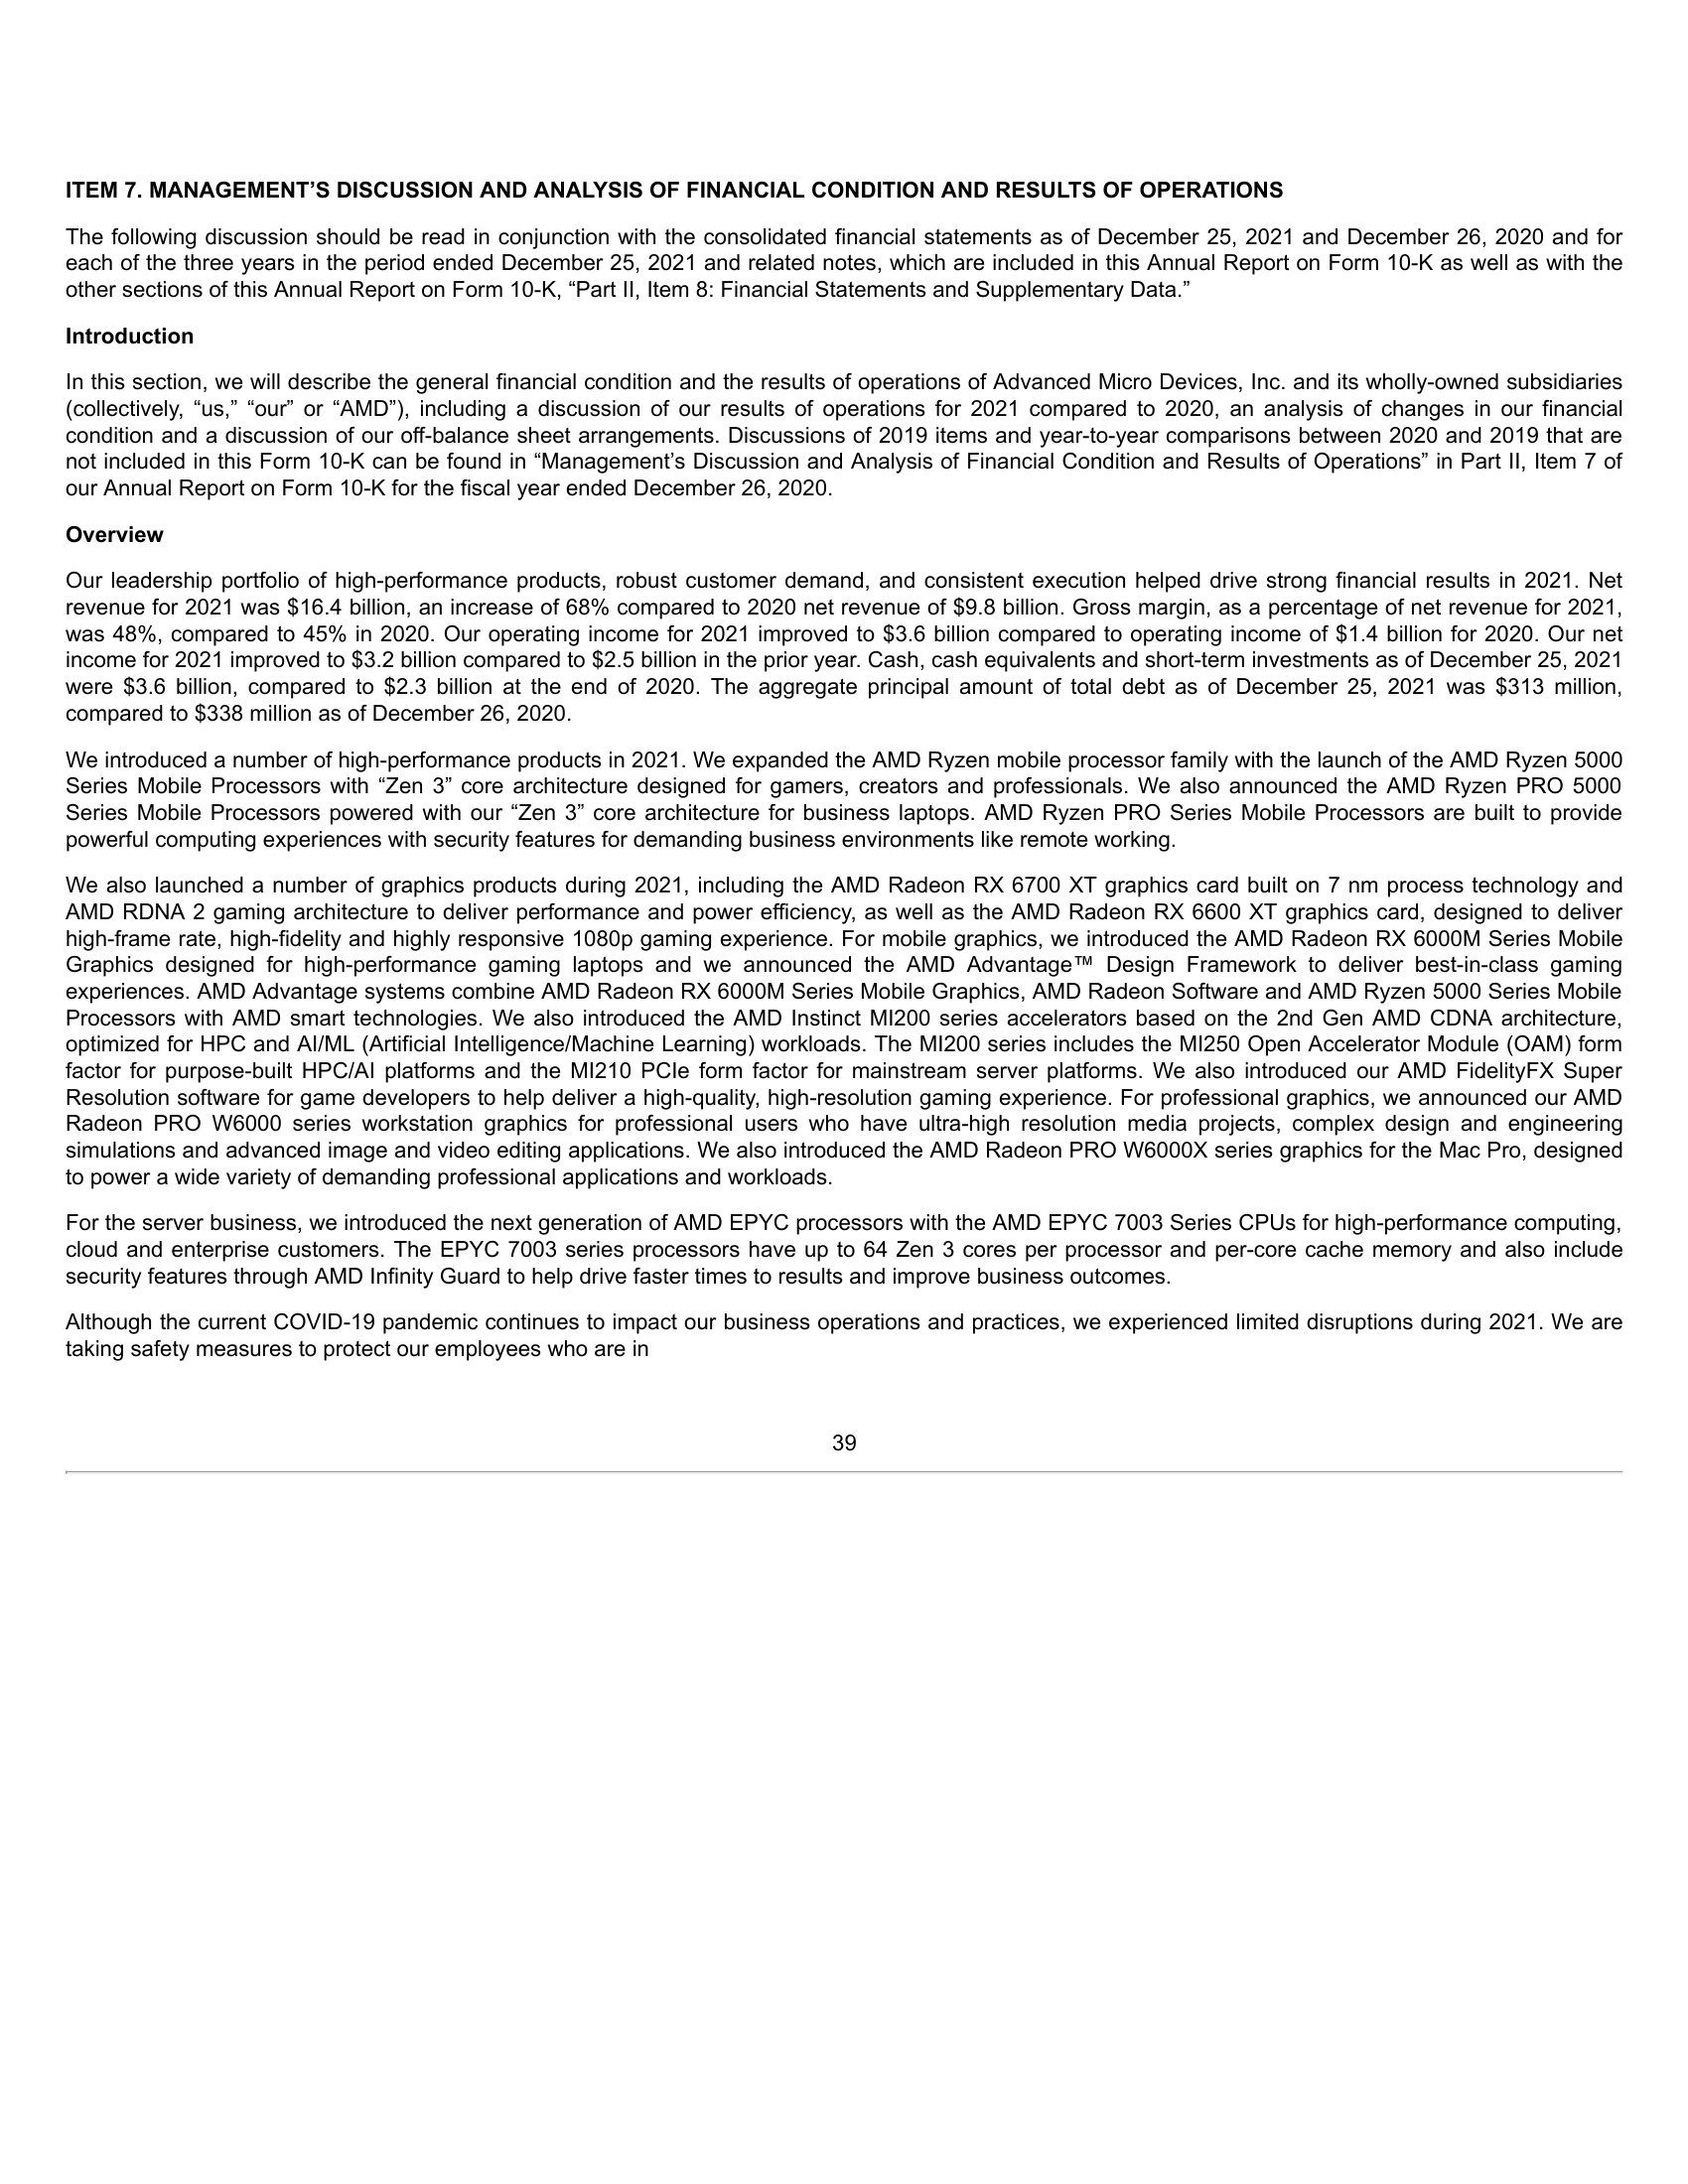

In [ ]:
images[41]

In [ ]:
text = """Our leadership portfolio of high-performance products, robust customer demand, and consistent execution helped drive strong financial results in 2021. Net
revenue for 2021 was $16.4 billion, an increase of 68% compared to 2020 net revenue of $9.8 billion. Gross margin, as a percentage of net revenue for 2021,
was 48%, compared to 45% in 2020. Our operating income for 2021 improved to $3.6 billion compared to operating income of $1.4 billion for 2020. Our net
income for 2021 improved to $3.2 billion compared to $2.5 billion in the prior year. Cash, cash equivalents and short-term investments as of December 25, 2021
were $3.6 billion, compared to $2.3 billion at the end of 2020. The aggregate principal amount of total debt as of December 25, 2021 was $313 million,
compared to $338 million as of December 26, 2020.
"""
print(text)

Our leadership portfolio of high-performance products, robust customer demand, and consistent execution helped drive strong financial results in 2021. Net
revenue for 2021 was $16.4 billion, an increase of 68% compared to 2020 net revenue of $9.8 billion. Gross margin, as a percentage of net revenue for 2021,
was 48%, compared to 45% in 2020. Our operating income for 2021 improved to $3.6 billion compared to operating income of $1.4 billion for 2020. Our net
income for 2021 improved to $3.2 billion compared to $2.5 billion in the prior year. Cash, cash equivalents and short-term investments as of December 25, 2021
were $3.6 billion, compared to $2.3 billion at the end of 2020. The aggregate principal amount of total debt as of December 25, 2021 was $313 million,
compared to $338 million as of December 26, 2020.



There are also ways to make these splitting of the document in an automatic way by running classification models on the document to identify its sections. This kind of application is out of scope of this notebook, but more information can be found on the binary classifiers [here](https://nlp.johnsnowlabs.com/models?edition=Finance+NLP&language=en&task=Text+Classification).

The `finner_financial_large` model detects 15 entities in the SEC 10-K fillings:

- `AMOUNT`: Numeric amounts, not percentages
- `PERCENTAGE`: Numeric amounts which are percentages
- `CURRENCY`: The currency of the amount
- `FISCAL_YEAR`: A date which expresses which month the fiscal exercise was closed for a specific year
- `DATE`: Generic dates in context where either it's not a fiscal year or it can't be asserted as such given the context
- `PROFIT`: Profit or also Revenue
- `PROFIT_INCREASE`: A piece of information saying there was a profit / revenue increase in that fiscal year
- `PROFIT_DECLINE`: A piece of information saying there was a profit / revenue decrease in that fiscal year
- `EXPENSE`: An expense or loss
- `EXPENSE_INCREASE`: A piece of information saying there was an expense increase in that fiscal year
- `EXPENSE_DECREASE`: A piece of information saying there was an expense decrease in that fiscal year
- `CF`: Cash flow operations
- `CF_INCREASE`: A piece of information saying there was a cash flow increase
- `CF_DECREASE`: A piece of information saying there was a cash flow decrease
- `LIABILITY`: A mentioned liability in the text



Using the function we created above, we can load the model by calling it with the correct parameters.  

- [finner_financial_large](https://nlp.johnsnowlabs.com/2022/10/20/finner_financial_large_en.html) for the pretained model
- [bert_embeddings_sec_bert_base](https://nlp.johnsnowlabs.com/2022/04/12/bert_embeddings_sec_bert_base_en_3_0.html) for the pretrained embeddings



In [ ]:
model = create_pipeline(
    ner_model="finner_financial_large",
    embeddings="bert_embeddings_sec_bert_base",
    language="en",
)
model.stages

sentence_detector_dl download started this may take some time.
Approximate size to download 514.9 KB
[OK!]
bert_embeddings_sec_bert_base download started this may take some time.
Approximate size to download 390.4 MB
[OK!]
finner_financial_large download started this may take some time.
[OK!]


[DocumentAssembler_ee6c7fd46c02,
 SentenceDetectorDLModel_8aaebf7e098e,
 REGEX_TOKENIZER_f1da2837a55e,
 BERT_EMBEDDINGS_29ce72cd673e,
 FinanceNerModel_aa3d475c7801,
 NER_CONVERTER_b91e60873ce2]

In [ ]:
# Check classes
model.stages[4].getClasses()

['O',
 'B-PERCENTAGE',
 'I-FISCAL_YEAR',
 'B-PROFIT_INCREASE',
 'B-CURRENCY',
 'B-EXPENSE_INCREASE',
 'I-PROFIT_INCREASE',
 'B-AMOUNT',
 'I-CURRENCY',
 'B-DATE',
 'I-PROFIT',
 'I-EXPENSE_DECREASE',
 'B-CF_INCREASE',
 'I-CF_DECREASE',
 'B-FISCAL_YEAR',
 'I-EXPENSE_INCREASE',
 'I-CF',
 'B-CF',
 'B-EXPENSE_DECREASE',
 'I-AMOUNT',
 'I-DATE',
 'I-PROFIT_DECLINE',
 'I-EXPENSE',
 'I-LIABILITY',
 'B-LIABILITY',
 'I-PERCENTAGE',
 'B-EXPENSE',
 'B-PROFIT_DECLINE',
 'B-PROFIT',
 'I-CF_INCREASE',
 'B-CF_DECREASE']

Let's test the model in an example text:

In [ ]:
df = spark.createDataFrame([[text]]).toDF("text")

result = model.transform(df)

Visualizing the identified entities in the `ner` column:

In [ ]:
result.select(
    F.explode(
        F.arrays_zip(result.token.result, result.ner.result, result.ner.metadata)
    ).alias("cols")
).select(
    F.expr("cols['0']").alias("token"),
    F.expr("cols['1']").alias("ner_label"),
    F.expr("cols['2']['confidence']").alias("confidence"),
).show(200, truncate=100)

+----------------+-------------+----------+
|           token|    ner_label|confidence|
+----------------+-------------+----------+
|             Our|            O|       1.0|
|      leadership|            O|    0.9978|
|       portfolio|            O|    0.9776|
|              of|            O|    0.9855|
|high-performance|            O|    0.9933|
|        products|            O|    0.7586|
|               ,|            O|    0.9999|
|          robust|            O|    0.9877|
|        customer|            O|    0.8912|
|          demand|            O|    0.7007|
|               ,|            O|    0.9998|
|             and|            O|    0.9998|
|      consistent|            O|    0.9834|
|       execution|            O|    0.8997|
|          helped|            O|       1.0|
|           drive|            O|    0.9998|
|          strong|            O|    0.9999|
|       financial|            O|     0.875|
|         results|            O|    0.9842|
|              in|            O|

Checking the same entities after passing through `NerConverterInternal`:

In [ ]:
result.select(
    F.explode(F.arrays_zip(result.ner_chunk.result, result.ner_chunk.metadata)).alias(
        "cols"
    )
).select(
    F.expr("cols['0']").alias("chunk"),
    F.expr("cols['1']['entity']").alias("ner_label"),
    F.expr("cols['1']['confidence']").alias("confidence"),
).show(truncate=False)


+----------------+---------+----------+
|chunk           |ner_label|confidence|
+----------------+---------+----------+
|2021            |DATE     |0.9891    |
|Net
revenue     |PROFIT   |0.42905   |
|2021            |DATE     |0.9769    |
|$               |CURRENCY |0.9973    |
|16.4 billion    |AMOUNT   |0.99925   |
|2020            |DATE     |0.9497    |
|net revenue     |PROFIT   |0.4899    |
|$               |CURRENCY |0.9967    |
|9.8 billion     |AMOUNT   |0.99950004|
|Gross margin    |PROFIT   |0.70945   |
|2021            |DATE     |0.9871    |
|2020            |DATE     |0.9856    |
|operating income|PROFIT   |0.58795   |
|2021            |DATE     |0.9875    |
|$               |CURRENCY |0.9995    |
|3.6 billion     |AMOUNT   |0.9997    |
|operating income|PROFIT   |0.70165   |
|$               |CURRENCY |0.999     |
|1.4 billion     |AMOUNT   |0.99965   |
|2020            |DATE     |0.9819    |
+----------------+---------+----------+
only showing top 20 rows



Using the visualization package:

In [ ]:
ner_visualizer = viz.NerVisualizer()

In [ ]:
ner_visualizer.display(
    result.collect()[0], label_col="ner_chunk", document_col="document"
)

### Using LightPipeline

[LightPipelines](https://nlp.johnsnowlabs.com/docs/en/concepts#using-spark-nlps-lightpipeline) are Spark NLP specific Pipelines, equivalent to Spark ML Pipeline, but meant to deal with smaller amounts of data. They’re useful working with small datasets, debugging results, or when running either training or prediction from an API that serves one-off requests.

Spark NLP LightPipelines are Spark ML pipelines converted into a single machine but the multi-threaded task, **becoming more than 10x times faster** for smaller amounts of data (small is relative, but 50k sentences are roughly a good maximum). To use them, we simply plug in a trained (fitted) pipeline and then annotate a plain text. We don't even need to convert the input text to DataFrame in order to feed it into a pipeline that's accepting DataFrame as an input in the first place. This feature would be quite useful when it comes to getting a prediction for a few lines of text from a trained ML model.

For more details:
[https://medium.com/spark-nlp/spark-nlp-101-lightpipeline-a544e93f20f1](https://medium.com/spark-nlp/spark-nlp-101-lightpipeline-a544e93f20f1)

In [ ]:
light_model = nlp.LightPipeline(model)

You can use strings or list of strings with the method [.annotate()](https://nlp.johnsnowlabs.com/api/python/reference/autosummary/sparknlp/base/light_pipeline/index.html#sparknlp.base.light_pipeline.LightPipeline.annotate) to get the results. To get more metadata in the result, use the method [.fullAnnotate()](https://nlp.johnsnowlabs.com/api/python/reference/autosummary/sparknlp/base/light_pipeline/index.html#sparknlp.base.light_pipeline.LightPipeline.fullAnnotate) instead. The result is a `list` if a `list` is given, or a `dict` if a string was given.

To extract the results from the object, you just need to parse the dictionary.

In [ ]:
lp_results = light_model.annotate(text)
lp_results.keys()

dict_keys(['document', 'ner_chunk', 'token', 'ner', 'embeddings', 'sentence'])

In [ ]:
# List with all the chunks
lp_results["ner_chunk"]

['2021',
 'Net\nrevenue',
 '2021',
 '$',
 '16.4 billion',
 '2020',
 'net revenue',
 '$',
 '9.8 billion',
 'Gross margin',
 '2021',
 '2020',
 'operating income',
 '2021',
 '$',
 '3.6 billion',
 'operating income',
 '$',
 '1.4 billion',
 '2020',
 'net\nincome',
 '2021',
 '$',
 '3.2 billion',
 '$',
 '2.5 billion',
 'Cash, cash equivalents and short-term investments',
 'December 25, 2021',
 '$',
 '3.6 billion',
 '$',
 '2.3 billion',
 '2020',
 'total debt',
 'December 25, 2021',
 '$',
 '313 million',
 '$',
 '338 million',
 'December 26, 2020']

We can see that the `.annotate()` did't return the labels in the `ner_chunk` item. How can we obtain them? Using the `.fullAnnotate()` instead. This method always returns a list.

In [ ]:
lp_results_full = light_model.fullAnnotate(text)
lp_results_full[0].keys()

dict_keys(['document', 'ner_chunk', 'token', 'ner', 'embeddings', 'sentence'])

In [ ]:
lp_results_full[0]["ner_chunk"]

[Annotation(chunk, 145, 148, 2021, {'chunk': '0', 'confidence': '0.9891', 'ner_source': 'ner_chunk', 'entity': 'DATE', 'sentence': '0'}),
 Annotation(chunk, 151, 161, Net
 revenue, {'chunk': '1', 'confidence': '0.42905', 'ner_source': 'ner_chunk', 'entity': 'PROFIT', 'sentence': '1'}),
 Annotation(chunk, 167, 170, 2021, {'chunk': '2', 'confidence': '0.9769', 'ner_source': 'ner_chunk', 'entity': 'DATE', 'sentence': '1'}),
 Annotation(chunk, 176, 176, $, {'chunk': '3', 'confidence': '0.9973', 'ner_source': 'ner_chunk', 'entity': 'CURRENCY', 'sentence': '1'}),
 Annotation(chunk, 177, 188, 16.4 billion, {'chunk': '4', 'confidence': '0.99925', 'ner_source': 'ner_chunk', 'entity': 'AMOUNT', 'sentence': '1'}),
 Annotation(chunk, 222, 225, 2020, {'chunk': '5', 'confidence': '0.9497', 'ner_source': 'ner_chunk', 'entity': 'DATE', 'sentence': '1'}),
 Annotation(chunk, 227, 237, net revenue, {'chunk': '6', 'confidence': '0.4899', 'ner_source': 'ner_chunk', 'entity': 'PROFIT', 'sentence': '1'}),
 A

Now we can see all the metadata in the annotation objects. Let's get the results in a tabular form.

In [ ]:
results_tabular = []
for res in lp_results_full[0]["ner_chunk"]:
    results_tabular.append(
        (
            res.begin,
            res.end,
            res.result,
            res.metadata["entity"],
            res.metadata["confidence"],
        )
    )

import pandas as pd

pd.DataFrame(results_tabular, columns=["begin", "end", "chunk", "entity", "confidence"])


,begin,end,chunk,entity,confidence
0,145,148,2021,DATE,0.9891
1,151,161,Net\nrevenue,PROFIT,0.42905
2,167,170,2021,DATE,0.9769
3,176,176,$,CURRENCY,0.9973
4,177,188,16.4 billion,AMOUNT,0.99925
5,222,225,2020,DATE,0.9497
6,227,237,net revenue,PROFIT,0.4899
7,242,242,$,CURRENCY,0.9967
8,243,253,9.8 billion,AMOUNT,0.99950004
9,256,267,Gross margin,PROFIT,0.70945


## BertForTokenClassification

BertForTokenClassification can load Bert Models with a token classification head on top (a linear layer on top of the hidden-states output) e.g. for Named-Entity-Recognition (NER) tasks.

Models from the HuggingFace 🤗 Transformers library are also compatible with Spark NLP 🚀. To see which models are compatible and how to import them see [Import Transformers into Spark NLP 🚀](https://github.com/JohnSnowLabs/spark-nlp/discussions/5669).

Using these models is very similar to the `NerModel` we used before. We adjust the pipeline by adding the `BertForTokenClassification` step instead of `NerModel`, and don't need to add the `Embeddings` step as it is already part of the new annotator. 

Then, the pipeline is just:

In [ ]:
def bert_pipeline(model_name="finner_roberta_ticker", language="en"):
    documentAssembler = (
        nlp.DocumentAssembler().setInputCol("text").setOutputCol("document")
    )

    tokenizer = nlp.Tokenizer().setInputCols("document").setOutputCol("token")

    tokenClassifier = (
        nlp.RoBertaForTokenClassification.pretrained(
            "finner_roberta_ticker", "en", "finance/models"
        )
        .setInputCols(["document", "token"])
        .setOutputCol("label")
    )

    ner_converter = (
        finance.NerConverterInternal()
        .setInputCols(["document", "token", "label"])
        .setOutputCol("ner_chunk")
    )

    pipeline = nlp.Pipeline(
        stages=[documentAssembler, tokenizer, tokenClassifier, ner_converter]
    )

    empty_data = spark.createDataFrame([[""]]).toDF("text")

    model = pipeline.fit(empty_data)
    return model

For Finance NLP we currently have only one model available, but we are constantly adding new models with every release. The available model is the `finner_bert_roles`, which identifies roles in financial texts (trained on Wikipedia articles, CUAD dataset, Financial 10-K documents and resumes.

In [ ]:
bert_model = bert_pipeline("finner_roberta_ticker", "en")
bert_model.stages

finner_roberta_ticker download started this may take some time.
Approximate size to download 443.8 MB
[OK!]


[DocumentAssembler_b2ced0afaccf,
 REGEX_TOKENIZER_1ee30a66886f,
 RoBertaForTokenClassification_e2b5719bb316,
 NER_CONVERTER_ce3844aaee1e]

In [ ]:
text = "Trading Guide: MRPL, SBI among 7 stock recommendations for Tuesday​"

res = bert_model.transform(spark.createDataFrame([[text]]).toDF("text"))

result_df = res.select(
    F.explode(
        F.arrays_zip(res.ner_chunk.result, res.ner_chunk.metadata)
    ).alias("cols")
).select(
     F.expr("cols['0']").alias("chunk"),
    F.expr("cols['1']['entity']").alias("ner_label"),
    F.expr("cols['1']['confidence']").alias("confidence"),
)

result_df.show(50, truncate=100)

+-----+---------+----------+
|chunk|ner_label|confidence|
+-----+---------+----------+
| MRPL|   TICKER|0.99974465|
|  SBI|   TICKER| 0.9999046|
+-----+---------+----------+



The model was trained in the available [Tweets dataset](https://www.kaggle.com/omermetinn/tweets-about-the-top-companies-from-2015-to-2020), with data from 2015 to 2020. 

## Training a custom NerModel

If your appliation needs different entities than the provided pretrained models can identify, what you can do is to train a new model that fits your requirements. To do that you first need to collect and label enough data and put them in the CoNLL 2003 format. If you are not sure how to annotate (label) text data and prepare it in the CoNLL 2003 format, try our free tool [Annotation Lab](https://nlp.johnsnowlabs.com/docs/en/alab/quickstart), where you can easily label text data and export in the correct format for training.

For our purposes here, we will use a sample file annotated by our team.

In [ ]:
! wget https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp-workshop/master/tutorials/Certification_Trainings_JSL/Finance/data/conll_noO.conll -O finance.conll

--2023-01-07 19:01:51--  https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp-workshop/master/tutorials/Certification_Trainings_JSL/Finance/data/conll_noO.conll
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1033219 (1009K) [text/plain]
Saving to: ‘finance.conll’

finance.conll       100%[===================>]   1009K  --.-KB/s    in 0.02s   

2023-01-07 19:01:52 (42.2 MB/s) - ‘finance.conll’ saved [1033219/1033219]



In [ ]:
!head -10 finance.conll

( NN NN O
d NN NN O
) NN NN O
OF NN NN O
THE NN NN O
SECURITIES NN NN O
EXCHANGE NN NN O
ACT NN NN O
OF NN NN O
1934 NN NN O


The pipeline is similar to the `NerModel` one, but instead of a `AnnotatorModel`, we use an `AnnotatorApproach` object to train the model. If these concepts of annotator and model is not familiar to you, please review the documentation [here](https://nlp.johnsnowlabs.com/docs/en/concepts).

To load the data into spark dataframe, you can use the [CoNLL](https://nlp.johnsnowlabs.com/docs/en/training#conll-dataset) helper.

In [ ]:
from sparknlp.training import CoNLL

finance_data = CoNLL().readDataset(spark, "finance.conll")
finance_data.selectExpr(
    "text", "token.result as tokens", "pos.result as pos", "label.result as label"
).show(3, False)

+---------------------------------------------------------------------------------------------------------------------------------------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+------------------------------------------------------------------------------------------------------------------------------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|text                                                                                                                                               |tokens                                                                                                                                                                             |pos               

In [ ]:
finance_data.columns

['text', 'document', 'sentence', 'token', 'pos', 'label']

Checking the labels we have:

In [ ]:
finance_data.select(F.explode("label.result")).distinct().show(50, False)

+------------------+
|col               |
+------------------+
|I-PROFIT_INCREASE |
|B-PROFIT          |
|B-AMOUNT          |
|I-PROFIT          |
|B-PERCENTAGE      |
|B-PROFIT_DECLINE  |
|B-PROFIT_INCREASE |
|I-DATE            |
|I-AMOUNT          |
|B-EXPENSE         |
|B-EXPENSE_INCREASE|
|I-EXPENSE_INCREASE|
|I-PROFIT_DECLINE  |
|O                 |
|B-CURRENCY        |
|I-PERCENTAGE      |
|B-FISCAL_YEAR     |
|I-FISCAL_YEAR     |
|B-DATE            |
|I-EXPENSE_DECREASE|
|B-EXPENSE_DECREASE|
|I-EXPENSE         |
+------------------+



In [ ]:
finance_data.select(
    F.explode(F.arrays_zip(finance_data.token.result, finance_data.label.result)).alias(
        "cols"
    )
).select(
    F.expr("cols['0']").alias("token"), F.expr("cols['1']").alias("ground_truth")
).groupBy(
    "ground_truth"
).count().orderBy(
    "count", ascending=False
).show(
    100, truncate=False
)

+------------------+-----+
|ground_truth      |count|
+------------------+-----+
|O                 |51912|
|I-DATE            |1932 |
|I-FISCAL_YEAR     |1812 |
|B-DATE            |1797 |
|B-AMOUNT          |1466 |
|B-CURRENCY        |1461 |
|I-AMOUNT          |1134 |
|B-FISCAL_YEAR     |605  |
|I-EXPENSE_INCREASE|546  |
|I-EXPENSE_DECREASE|390  |
|B-PERCENTAGE      |350  |
|I-PROFIT_INCREASE |288  |
|I-EXPENSE         |280  |
|B-EXPENSE_INCREASE|274  |
|I-PROFIT          |228  |
|B-EXPENSE_DECREASE|191  |
|B-PROFIT_INCREASE |164  |
|B-EXPENSE         |150  |
|B-PROFIT          |122  |
|I-PROFIT_DECLINE  |93   |
|B-PROFIT_DECLINE  |58   |
|I-PERCENTAGE      |12   |
+------------------+-----+



The CoNLL data already have the columns `document`, `sentence` and `token` that are needed to create the NER model, the only one that is missing is the Embeddings. So let's use the same embedding pretrained model as before to train this new one, but you could use any Embedding model instead (check [NLPModels Hun](https://nlp.johnsnowlabs.com/models?task=Embeddings) for a list of available embedding models).

In [ ]:
bert_embeddings = (
    nlp.BertEmbeddings.pretrained("bert_embeddings_sec_bert_base", "en")
    .setInputCols("sentence", "token")
    .setOutputCol("embeddings")
    .setMaxSentenceLength(512)
)

bert_embeddings_sec_bert_base download started this may take some time.
Approximate size to download 390.4 MB
[OK!]


Split the data into train and test sets

In [ ]:
train_data, test_data = finance_data.randomSplit([0.8, 0.2], seed=42)

We transform the test data and store it into a parquet file so we can use it during training for testing.

In [ ]:
bert_embeddings.transform(test_data).write.mode("overwrite").parquet(
    "test_data_embeddings.parquet"
)

Declare the train annotator using the `NerApproach`. In this example, we will train for only 2 epochs to illustrate how to use the annotator without spending too much time waiting the model to finish training, but we recommend to use 5-50 epochs depending on your application to obtain a proper model.

In [ ]:
nerTagger = (
    finance.NerApproach()
    .setInputCols(["sentence", "token", "embeddings"])
    .setLabelColumn("label")
    .setOutputCol("ner")
    .setMaxEpochs(2)
    .setLr(0.002)
    .setBatchSize(4)
    .setRandomSeed(42)
    .setVerbose(1)
    .setValidationSplit(0.0)
    .setEvaluationLogExtended(True)
    .setEnableOutputLogs(True)
    .setIncludeConfidence(True)
    .setOutputLogsPath("ner_logs")
    .setTestDataset("test_data_embeddings.parquet")
)

In [ ]:
ner_pipeline = nlp.Pipeline(stages=[bert_embeddings, nerTagger])

In [ ]:
# Free memory from previous objects
del (
    model,
    light_model,
    bert_model,
    res,
    lp_results,
    lp_results_full,
    result,
    result_df,
    results_tabular,
)

In [ ]:
%%time

ner_model = ner_pipeline.fit(train_data)

CPU times: user 5.02 s, sys: 632 ms, total: 5.65 s
Wall time: 16min 1s


In [ ]:
import os

ner_logs = ["ner_logs/" + x for x in os.listdir("ner_logs") if x.endswith(".log")]

log_file = ner_logs[0]
log_file

'ner_logs/FinanceNerApproach_3c8b1caa210c.log'

In [ ]:
!cat $log_file

Name of the selected graph: medical-ner-dl/blstm_38_768_128_200.pb
Training started - total epochs: 2 - lr: 0.002 - batch size: 4 - labels: 22 - chars: 98 - training examples: 1338


Epoch 1/2 started, lr: 0.002, dataset size: 1338


Epoch 1/2 - 131.88s - loss: 4906.1626 - avg training loss: 14.558346 - batches: 337
Quality on test dataset: 
time to finish evaluation: 6.22s
Total test loss: 442.2220	Avg test loss: 5.7431
label	 tp	 fp	 fn	 prec	 rec	 f1
I-AMOUNT	 194	 1	 5	 0.9948718	 0.9748744	 0.9847716
B-AMOUNT	 250	 6	 1	 0.9765625	 0.99601597	 0.9861933
B-DATE	 354	 54	 14	 0.86764705	 0.9619565	 0.9123711
I-DATE	 450	 37	 24	 0.92402464	 0.9493671	 0.93652445
I-EXPENSE	 27	 37	 34	 0.421875	 0.44262296	 0.432
B-PROFIT_INCREASE	 14	 8	 8	 0.6363636	 0.6363636	 0.6363636
B-EXPENSE	 10	 23	 19	 0.3030303	 0.3448276	 0.32258067
I-PERCENTAGE	 0	 0	 4	 0.0	 0.0	 0.0
I-PROFIT_DECLINE	 0	 0	 11	 0.0	 0.0	 0.0
I-PROFIT	 4	 1	 29	 0.8	 0.121212125	 0.21052632
B-CURRENCY	 249	 4	 0	 0.98418

Testing the model

In [ ]:
import pandas as pd
from sklearn.metrics import classification_report

predictions = ner_model.transform(test_data)


preds_df = (
    predictions.select(
        F.explode(
            F.arrays_zip(
                predictions.token.result,
                predictions.label.result,
                predictions.ner.result,
            )
        ).alias("cols")
    )
    .select(
        F.expr("cols['0']").alias("token"),
        F.expr("cols['1']").alias("ground_truth"),
        F.expr("cols['2']").alias("prediction"),
    )
    .toPandas()
)

In [ ]:
print(classification_report(preds_df['ground_truth'], preds_df['prediction'], digits=4))

                    precision    recall  f1-score   support

          B-AMOUNT     0.9804    0.9960    0.9881       251
        B-CURRENCY     0.9960    1.0000    0.9980       249
            B-DATE     0.9299    0.9375    0.9337       368
         B-EXPENSE     0.5217    0.4138    0.4615        29
B-EXPENSE_DECREASE     0.5000    0.1379    0.2162        29
B-EXPENSE_INCREASE     0.5104    0.8167    0.6282        60
     B-FISCAL_YEAR     0.9780    0.9271    0.9519        96
      B-PERCENTAGE     0.9403    1.0000    0.9692        63
          B-PROFIT     0.4167    0.2381    0.3030        21
  B-PROFIT_DECLINE     0.0000    0.0000    0.0000         8
 B-PROFIT_INCREASE     0.6957    0.7273    0.7111        22
          I-AMOUNT     1.0000    0.9799    0.9898       199
            I-DATE     0.9475    0.9515    0.9495       474
         I-EXPENSE     0.5417    0.4262    0.4771        61
I-EXPENSE_DECREASE     0.6923    0.1607    0.2609        56
I-EXPENSE_INCREASE     0.5072    0.8898

More robust evaluation using the conll eval utility package:

In [ ]:
!wget  -q https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp-workshop/master/tutorials/Certification_Trainings/Public/utils/conll_eval.py

In [ ]:
import conll_eval

metrics = conll_eval.evaluate(
    preds_df["ground_truth"].values, preds_df["prediction"].values
)

processed 12037 tokens with 1196 phrases; found: 1212 phrases; correct: 1071.
accuracy:  87.73%; (non-O)
accuracy:  96.28%; precision:  88.37%; recall:  89.55%; FB1:  88.95
           AMOUNT: precision:  96.47%; recall:  98.01%; FB1:  97.23  255
         CURRENCY: precision:  99.60%; recall: 100.00%; FB1:  99.80  250
             DATE: precision:  91.96%; recall:  93.21%; FB1:  92.58  373
          EXPENSE: precision:  44.00%; recall:  37.93%; FB1:  40.74  25
 EXPENSE_DECREASE: precision:  50.00%; recall:  13.79%; FB1:  21.62  8
 EXPENSE_INCREASE: precision:  45.19%; recall:  78.33%; FB1:  57.32  104
      FISCAL_YEAR: precision:  96.74%; recall:  92.71%; FB1:  94.68  92
       PERCENTAGE: precision:  91.04%; recall:  96.83%; FB1:  93.85  67
           PROFIT: precision:  35.71%; recall:  23.81%; FB1:  28.57  14
   PROFIT_DECLINE: precision:   0.00%; recall:   0.00%; FB1:   0.00  0
  PROFIT_INCREASE: precision:  66.67%; recall:  72.73%; FB1:  69.57  24


In [ ]:
# micro, macro, avg
metrics[0]

(88.36633663366337, 89.54849498327759, 88.95348837209303)

In [ ]:
pd.DataFrame(metrics[1], columns=["entity", "precision", "recall", "f1", "support"])

,entity,precision,recall,f1,support
0,AMOUNT,96.470588,98.007968,97.233202,255
1,CURRENCY,99.600000,100.000000,99.799599,250
2,DATE,91.957105,93.206522,92.577598,373
3,EXPENSE,44.000000,37.931034,40.740741,25
4,EXPENSE_DECREASE,50.000000,13.793103,21.621622,8
5,EXPENSE_INCREASE,45.192308,78.333333,57.317073,104
6,FISCAL_YEAR,96.739130,92.708333,94.680851,92
7,PERCENTAGE,91.044776,96.825397,93.846154,67
8,PROFIT,35.714286,23.809524,28.571429,14
9,PROFIT_DECLINE,0.000000,0.000000,0.000000,0


Getting information from the logs with the log parser utility package:

In [ ]:
!wget -q https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp-workshop/master/tutorials/Certification_Trainings/Public/utils/ner_log_parser.py

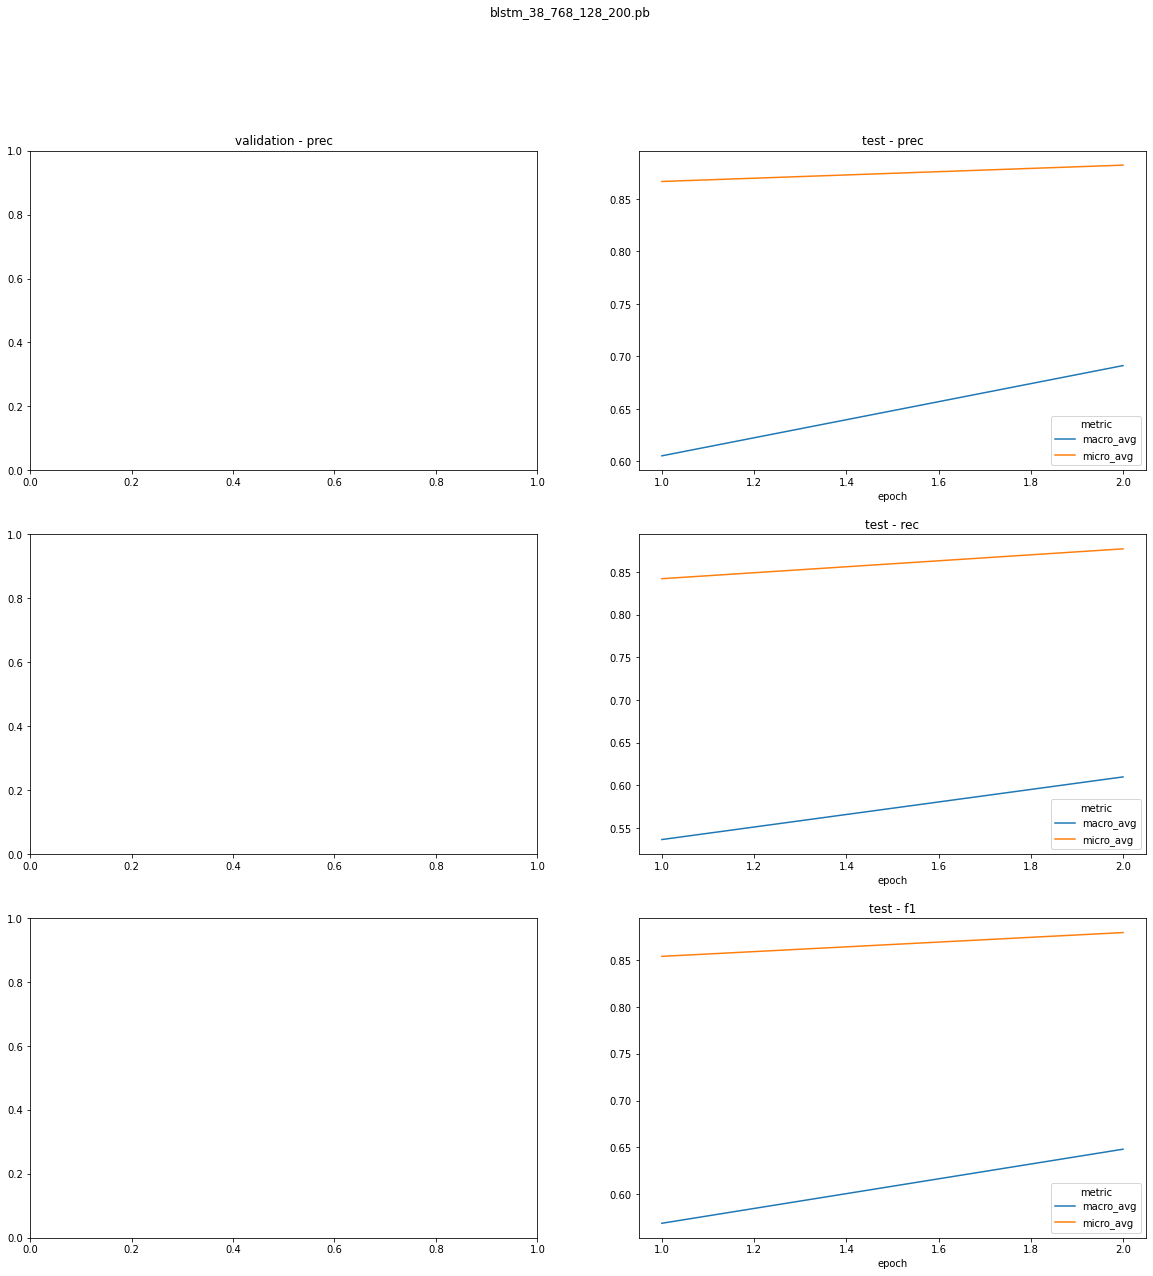

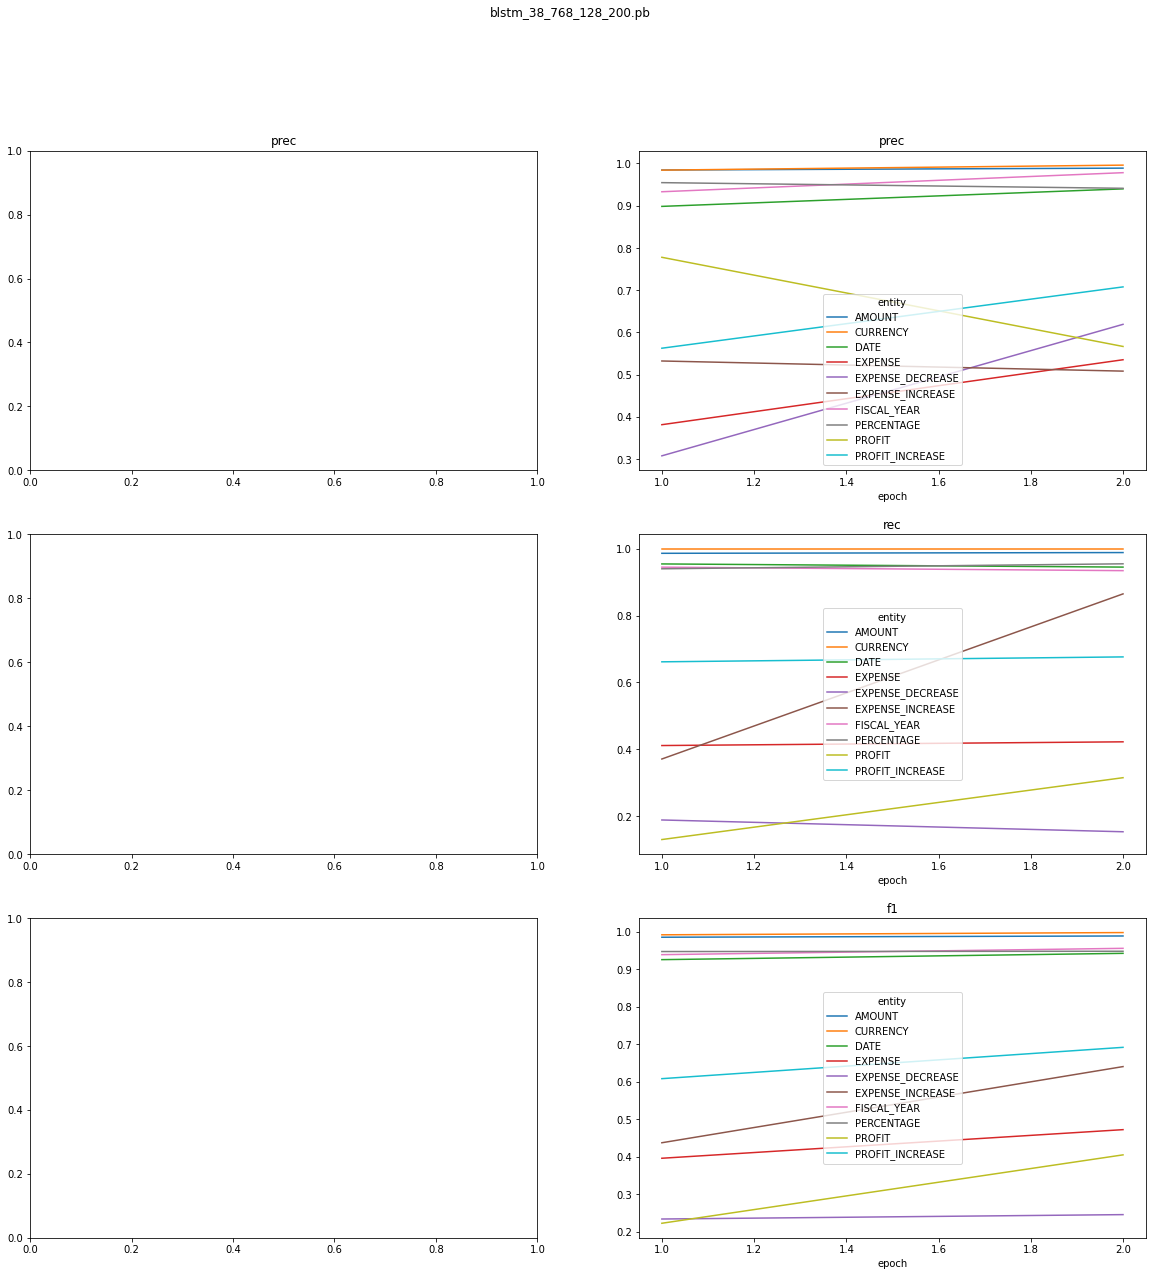

In [ ]:
import ner_log_parser

%matplotlib inline

ner_log_parser.get_charts(log_file)

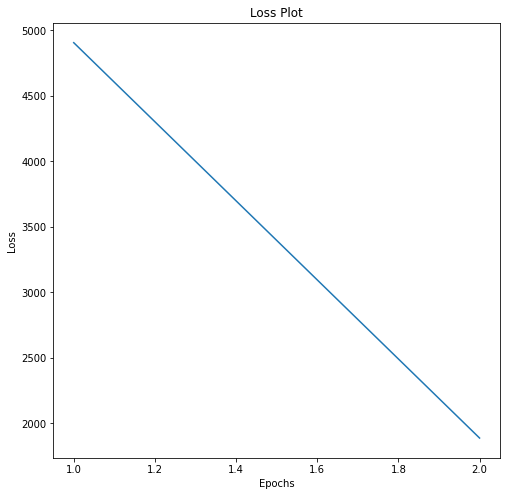

In [ ]:
ner_log_parser.loss_plot(log_file)

Saving the model for future use by loading from disk with

```python
loaded_ner_model = (
    finance.NerModel.load("MY_SAVED_MODEL_PATH")
    .setInputCols(["sentence", "token", "embeddings"])
    .setOutputCol("ner")
)
```

In [ ]:
ner_model.stages

[BERT_EMBEDDINGS_29ce72cd673e, FinanceNerModel_b5cbf97fc7c4]

In [ ]:
# Saving stage for NER model
ner_model.stages[1].write().overwrite().save('my_NER_model')